In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
from scipy.optimize import curve_fit
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
sys.path.append('../code_general_Finkelsteinlab/')
import read_model_ID;
reload(read_model_ID);
import Nucleaseq_data_processing as processing
reload(processing);

##### Load data

In [2]:
filename = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../' + '/data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_nucleaseq(filename,path_to_data)


#for i in range(len(yerr)):
#    for j in range(len(yerr[i])):
#        yerr[i][j] = ydata[i][j]*0.05

86


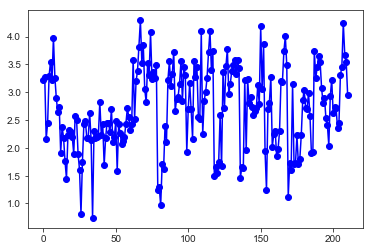

In [76]:
relative_error = np.zeros(len(xdata))
for i in range(len(xdata)):
    if xdata[i]==[2]:
        print i
    data = ydata[i]
    error = yerr[i]
    relative_error_temp = np.zeros(len(error))
    for j in range(len(error)):
        relative_error_temp[j] = data[j]/error[j]
    relative_error[i] = np.mean(relative_error_temp)
    
plt.plot(range(len(xdata)),relative_error,'b-o')
        

## No errors are very low

In [5]:
indices_low = np.where(relative_error<0.1)
low_error = relative_error[indices_low]
low_error

array([], dtype=float64)

## Several errors are very high

In [5]:
indices_high = np.where(relative_error>0)
high_error = relative_error[indices_high]
len(high_error)

211

[13, 15]


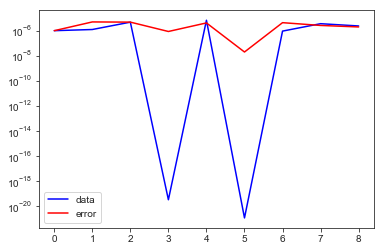

In [82]:
a = 34

plt.semilogy(ydata[indices_high[0][a]],'b')
plt.semilogy(yerr[indices_high[0][a]],'r')
plt.legend(['data','error'])
print xdata[indices_high[0][a]]
             

In [78]:
data = np.array(ydata[indices_high[0][a]])
error = np.array(yerr[indices_high[0][a]])
fitdata = np.ones(len(data))*10**(-4)

indices = np.where(data>10**(-30))
data = data[indices[0]]
error = error[indices[0]]
fitdata = fitdata[indices[0]]
fitdata[5] = 0

print 'data: ' + str(data) + str(len(data))
print 'error: ' + str(error)

chi = np.sum(((data-fitdata)/error)**2)
print 'chi: ' + str(chi)


data: [0.00302398 0.00481272 0.00267308 0.00374941 0.01532989 0.00273018
 0.00243805 0.01546467 0.00289152 0.02249749 0.01959403 0.01630685
 0.00200198 0.02024392 0.02193138 0.00408631 0.00234883 0.00274618
 0.00379279 0.00293514 0.00474809 0.02220634 0.02046343 0.00235112
 0.01781011 0.00210578 0.00262602 0.00287259 0.00260141 0.00236713
 0.03300997 0.0137564  0.00247134 0.02347521 0.00280107 0.00265908
 0.00167847 0.00203722 0.00293455 0.0323968  0.00310258 0.0285706
 0.02903326 0.00292891 0.00381339 0.00271935 0.00265613 0.0163577
 0.02001594 0.0039426  0.00302129 0.01649528 0.00253371 0.00266316
 0.00256742 0.0039054  0.00362561 0.00387296 0.00405786 0.01641399
 0.01890896 0.01948965 0.00250184 0.00335751 0.00230128 0.00252301
 0.00270441 0.02492391 0.00275382 0.00155341 0.00225795 0.01424896
 0.00296974 0.01893808 0.00280003 0.02069364 0.02582787 0.00272201
 0.00312786 0.00252552 0.02134696 0.00259611 0.00252068 0.0023944 ]84
error: [0.00108639 0.00246089 0.00064514 0.00110761 0.0

(array([0.00281546]), array([[2.48901272e-08]]))


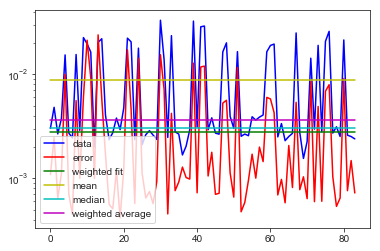

In [79]:
def f(x,a):
    return a

para = curve_fit(f,range(len(data)),data,10**(-3),error)

plt.semilogy(ydata[indices_high[0][a]],'b')
plt.semilogy(yerr[indices_high[0][a]],'r')
plt.semilogy(range(len(data)),np.ones(len(data))*para[0],'g')
plt.semilogy(range(len(data)),np.ones(len(data))*np.mean(data),'y')
plt.semilogy(range(len(data)),np.ones(len(data))*np.median(data),'c')
plt.semilogy(range(len(data)),np.ones(len(data))*np.average(data, weights=np.reciprocal(error)),'m')
plt.legend(['data','error','weighted fit','mean','median','weighted average'])
print para